# 1. 들어가며
* ARIMA 모델에 넣기 전에 시계열 데이터에서 고려해야 될 점에 대해서 생각해봅시다.
* 앞서 배운 추세(trend), 계절성(sesonality), 잔차(residual), 평균 및 분산의 변화, 분산이 일정한지 등을 확인합니다.
* ARIMA는 통계 모델 중 대표적인 시계열 예측 모델입니다. 현재 시점을 과거 시점과 과거 예측 오차를 통해서 설명합니다.
* ARIMA의 수식을 일반화하기 위해 사용하는 p(AR) , d(차분의 개수), q(MA)에 대해서 생각해봅시다.
* ARIMA를 제대로 적용하였는지 확인하기 위해 Box-Jenkins 방법을 사용하여 모델을 분별하고 최종 모델을 선택할 수 있습니다.
* 제대로 된 모델에서 얻은 값과 실제 값의 차이인 잔차들이 상관이 있는지 없는지 확인해야 합니다.

## 학습목표
* ARIMA에 대해 알아봅시다.
* ARIMA의 파생 모델에 대해 알아보고 직접 실습해보는 시간을 가져봅시다.

# 2. 시계열 예측의 절대강자, ARIMA

## ARIMA
* 2017년까지 LSTM과 Transformer를 이용한 접근이 ARIMA를 비롯한 통계 모델에게 우세를 점하지 못하고 있습니다.
* 현재도 복잡성이 낮은 예측문제에서 ARIMA는 높은 예측 성능을 보이고 있습니다.
* ARIMA = AR + Integration+ MA
    * AR: AutoRegressive Model (자기 회귀)
    * Integration (차분)
    * MA: Moving Average Model (이동평균)

#### Auto Regressive Model
* `AR(p)` 모델은 과거가 미래를 예측한다는 직관적인 사실에 의존하는 모델로서, 특정시점 t의 값은 이전 시점을 구성하는 값들의 함수라는 시계열 과정을 상정합니다.    
    
* $
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \cdots + \phi_p y_{t-p} + \varepsilon_t
$


#### Moving Average Model
* `MA(q)` 모델은 각 시점의 데이터가 최근의 과거 값에 대한 오차항으로 구성된 함수로 표현된 과정에 의존한다고 볼 수 있습니다. 그리고 각 오차항은 서로 독립적입니다.    
* 이는 과거의 오차(그 시점에 발생한 독립적인 사건)이 현재의 과정에 영향을 미친다고 보는 것입니다.    
    
* $
y_t = c + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \cdots + \theta_q \varepsilon_{t-q}
$


#### ARIMA equation
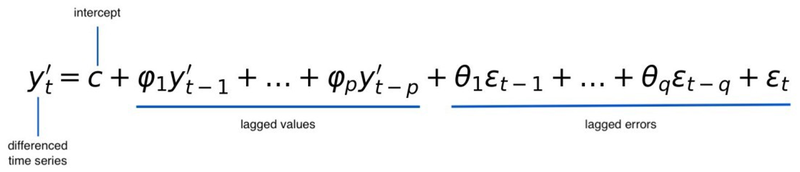
* p: AR lagged values
* d: 차분의 개수
* q: MA lagged errors


#### 파라미터 p, d, q의 적합
ACF, PACF 함수를 보며 수동으로 파라미터를 적합시키는 방법을 박스-젠킨스 법(Box-Jenkins)이라고 합니다.

1. 시각화 및 도메인 지식을 바탕으로 초기 파라미터(p,d,q)를 추정합니다.
2. 모델 적합 후 시각화 및 성능 평가를 수행합니다.
3. 부적합하다고 생각 될 경우 파라미터를 조정합니다.
4. 이를 반복합니다.

#### Auto-Arima와 Overfitting의 가능성
Log likelihood를 이용한 Step-wise 방법인 Auto-Arima가 존재합니다.

1. 하지만 해당 방법을 이용할 경우, 과도하게 복잡한 모델을 적합할 위험성이 존재합니다.
2. 각 시계열의 도메인과 특징에 따라 다르지만, 일반적으로 차분(d)이 2를 넘어가면 오버피팅으로 보며, AR(p) MA(q)도 3을 넘기지 않는 것이 바람직합니다.


# 3. ARIMA의 파생 모델

### 많은 요소를 ARIMA에 추가해보기
* ARIMA + seasonality = SARIMA
* ARIMA + Time series regression = ARIMAX (dynamic regression)
* SARIMA + ARIMAX = SARIMAX

#### SARIMA
* ARIMA 모델에 계절성의 요소를 추가한 모델입니다.
* 계절(m)에 대한 AR(P), 차분(D), MA(Q)을 ARIMA 모델에 포함시킴으로써 계절성이 있는 데이터도 모델링할 수 있습니다.

#### ARIMAX
* 일반적으로 회귀분석은 시계열 회귀에 적합하지 않다. 이유는 선형회귀는 독립항등분호(iid)를 가정하기때문에 시계열의 특성과는 다르다.
* 하지만 회귀의 오차항이 ARIMA 시계열이라고 가정한 경우, 예측 작업에 회귀분석을 보다 손쉽게 적용할 수 있다.


### ARIMA 실습

1. 데이터 연결하기
* 느낌표(!)는 주피터 노트북에서 리눅스 셀 명령어를 실행할 때 사용한다.
* data 폴더 내부에 Daily_Demand_forecasting_Orders.csv 파일을 사용한다.

In [3]:
# 필요한 라이브러리 다운로드
!pip install pmdarima


   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   --------------------------------------- 614.7/614.7 kB 11.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 31.4 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   ---------------------------------------- 0/2 [Cython]
   -------------------- ------------------- 1/2 [pmdarima]
   -------------------- ------------------- 1/2 [pmdarima]
   -----------

In [4]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

In [5]:
# 데이터 불러오기
df = pd.read_csv(r'C:\Users\nini\Desktop\TimeSeriese_Learning_training\training\data\Daily_Demand_Forecasting_Orders.csv', delimiter=';')

In [6]:
# 데이터 확인
df.columns

Index(['Week of the month (first week, second, third, fourth or fifth week',
       'Day of the week (Monday to Friday)', 'Non-urgent order',
       'Urgent order', 'Order type A', 'Order type B', 'Order type C',
       'Fiscal sector orders', 'Orders from the traffic controller sector',
       'Banking orders (1)', 'Banking orders (2)', 'Banking orders (3)',
       'Target (Total orders)'],
      dtype='object')

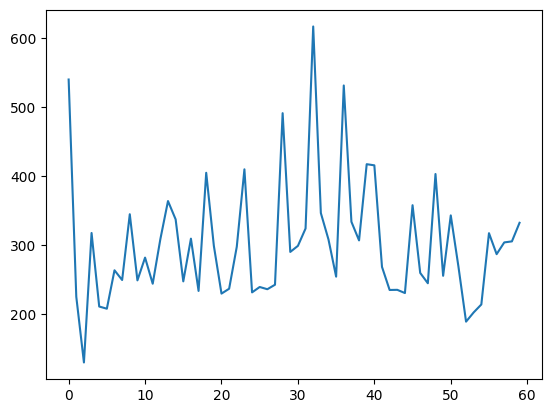

In [7]:
# 데이터 확인 및 시각화
data = df['Target (Total orders)']
plt.plot(data)
plt.show()

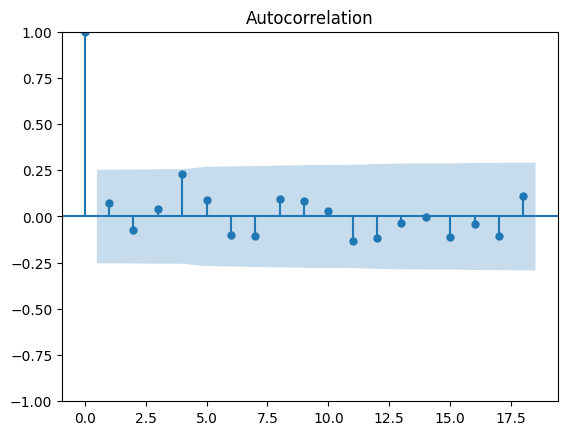

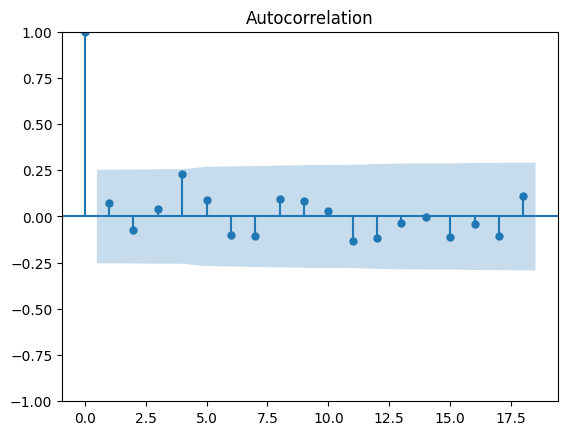

In [8]:
# ACF를 통한 데이터 확인 및 시각화
plot_acf(data)

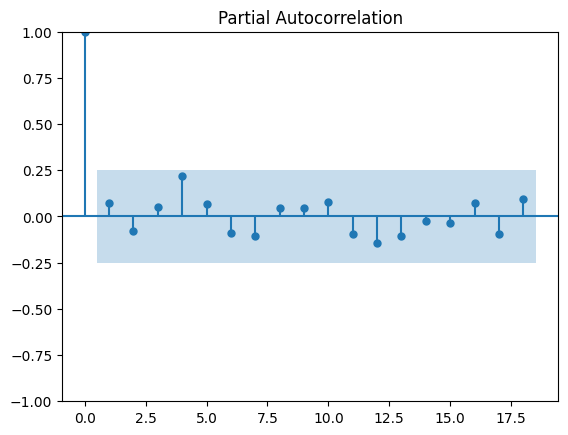

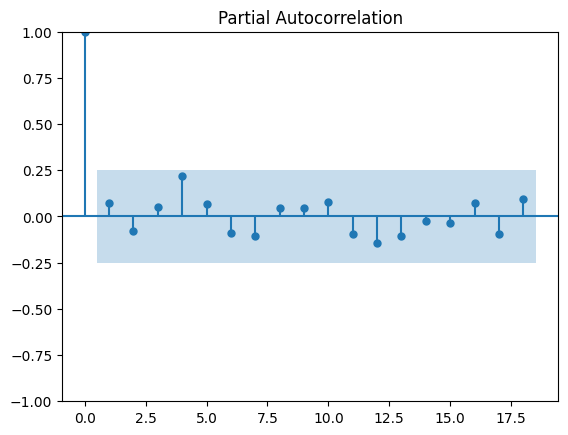

In [9]:
# PACF를 통한 데이터 확인 및 시각화
plot_pacf(data)

In [10]:
# ARIMA 적용
model1 = ARIMA(data, order=(1,0,0))
model2 = ARIMA(data, order=(0,0,1))
model3 = ARIMA(data, order=(1,0,1))

res1 = model1.fit()
res2 = model2.fit()
res3 = model3.fit()

#### ARIMA 결과 확인

- **fittedvalues** : 주어진 값 x를 회귀 방정식에 대입해서 결과를 알려줍니다.

    * \( \hat{y} \) 는 모델을 거쳐서 나온 예측된 결과로 부를 수 있습니다.

    * \[ \hat{y}_i = b_0 + b_1 x_i \] : 수식에서 \( y \)는 적합된 값(fitted value)입니다.

    * \[ e_t = y_t - \hat{y}_t \] : 수식에서 \( e \)는 잔차입니다. 잔차는 관측치와 해당 적합된 값 사이의 차이와 같습니다.

- 시각화를 통해 fitted value를 데이터셋과 비교해 봅니다.

In [11]:
# ARIMA 결과 확인
print(res1.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 0)   Log Likelihood                -354.181
Date:                   Mon, 25 Aug 2025   AIC                            714.362
Time:                           12:50:58   BIC                            720.645
Sample:                                0   HQIC                           716.819
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.0429     17.323     17.378      0.000     267.090     334.995
ar.L1          0.0804      0.187      0.430      0.667      -0.286       0.447
sigma2      7848.5794   1363

In [12]:
print(res2.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(0, 0, 1)   Log Likelihood                -354.143
Date:                   Mon, 25 Aug 2025   AIC                            714.286
Time:                           12:51:01   BIC                            720.569
Sample:                                0   HQIC                           716.743
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.3222     17.628     17.094      0.000     266.773     335.872
ma.L1          0.0982      0.179      0.548      0.583      -0.253       0.449
sigma2      7837.9609   1382

In [13]:
print(res3.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Target (Total orders)   No. Observations:                   60
Model:                    ARIMA(1, 0, 1)   Log Likelihood                -354.075
Date:                   Mon, 25 Aug 2025   AIC                            716.150
Time:                           12:51:04   BIC                            724.528
Sample:                                0   HQIC                           719.427
                                    - 60                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        301.2370     17.534     17.180      0.000     266.871     335.603
ar.L1         -0.2589      1.442     -0.180      0.857      -3.085       2.567
ma.L1          0.3581      1

In [14]:
predictions = res2.fittedvalues

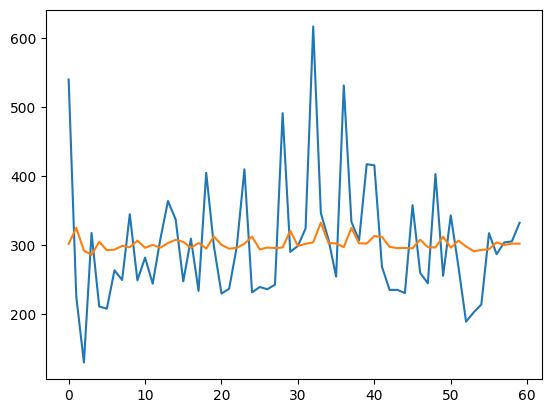

In [15]:
plt.figure()
plt.plot(data)
plt.plot(predictions)
plt.show()

#### Auto ARIMA 적용

Auto ARIMA를 적용하여 나오는 결과와 summary를 통해 나온 결과를 비교 분석해봅시다.

In [16]:
# Auto ARIMA 적용
model = pm.AutoARIMA(seasonal=False, stepwise=True, suppress_warnings=True, trace=True)

In [17]:
res = model.fit(data)

c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=862.092, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=747.489, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=818.332, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=741.019, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=735.047, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec


c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=724.987, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=723.725, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=722.186, Time=0.05 sec


c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=791.913, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=716.399, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=714.286, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=712.710, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=714.363, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.067 seconds


c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\nini\anaconda3\envs\py3_11\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 

In [18]:
# 결과 확인
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                        SARIMAX   Log Likelihood                -354.355
Date:                Mon, 25 Aug 2025   AIC                            712.710
Time:                        12:51:41   BIC                            716.898
Sample:                             0   HQIC                           714.348
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    300.8733     15.236     19.747      0.000     271.011     330.736
sigma2      7894.7169   1313.366      6.011      0.000    5320.567    1.05e+04
Ljung-Box (L1) (Q):                   0.33   Jarque-

# 4. 마무리

#### 이번 시간 정리
1. 들어가며
* 시계열의 통계 모델인 ARIMA는 어떤 원리로 예측을 할지, 파생 모델에는 무엇이 있을지 생각해봅시다.
---
2. 시계열 예측의 절대강자 “ARIMA”
* ARIMA는 1976년에 체계화된 알고리즘으로 현재도 복잡성이 낮은 예측문제에서 ARIMA는 높은 예측 성능을 보이고 있습니다.
* 자기 회귀(AutoRegressive Model, AR(p)) : 과거가 미래를 예측한다는 직관적인 사실에 의존하는 모델 입니다.
* 이동 평균(Moving Average Model, MA(q)) : 과거의 오차(그 시점에 발생한 독립적인 사건)가 현재의 과정에 영향을 미친다고 봅니다.
* 박스-젠킨스 법(Box–Jenkins) : ACF, PACF 함수를 보며 수동으로 파라미터를 적합시키는 방법입니다.
---
3. ARIMA의 파생모델
* SARIMA : 계절(m)에 대한 AR(P), 차분(D), MA(Q)를 ARIMA 모델에 포함시킴으로써 계절성이 있는 데이터도 모델링할 수 있습니다.
* ARIMAX : ARIMA에 회귀를 결합할 경우 우리는 예측 작업에 회귀분석을 보다 손쉽게 적용할 수 있습니다.